In [1]:
from tensorflow.keras.utils import image_dataset_from_directory
train_dataset = image_dataset_from_directory(
 "/kaggle/input/100-bird-species/train",
    image_size=(224, 224),
    batch_size=32)
test_dataset = image_dataset_from_directory(
   "/kaggle/input/100-bird-species/test",
    image_size=(224, 224),
    batch_size=32)
validata = image_dataset_from_directory(
   "/kaggle/input/100-bird-species/valid",
    image_size=(224, 224),
    batch_size=32)

2024-04-24 20:58:43.145375: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-24 20:58:43.145480: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-24 20:58:43.285583: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 84635 files belonging to 525 classes.
Found 2625 files belonging to 525 classes.
Found 2625 files belonging to 525 classes.


In [2]:
import numpy as np
class_names = train_dataset.class_names
np.shape(class_names)

(525,)

In [3]:
class_names[:10]

['ABBOTTS BABBLER',
 'ABBOTTS BOOBY',
 'ABYSSINIAN GROUND HORNBILL',
 'AFRICAN CROWNED CRANE',
 'AFRICAN EMERALD CUCKOO',
 'AFRICAN FIREFINCH',
 'AFRICAN OYSTER CATCHER',
 'AFRICAN PIED HORNBILL',
 'AFRICAN PYGMY GOOSE',
 'ALBATROSS']

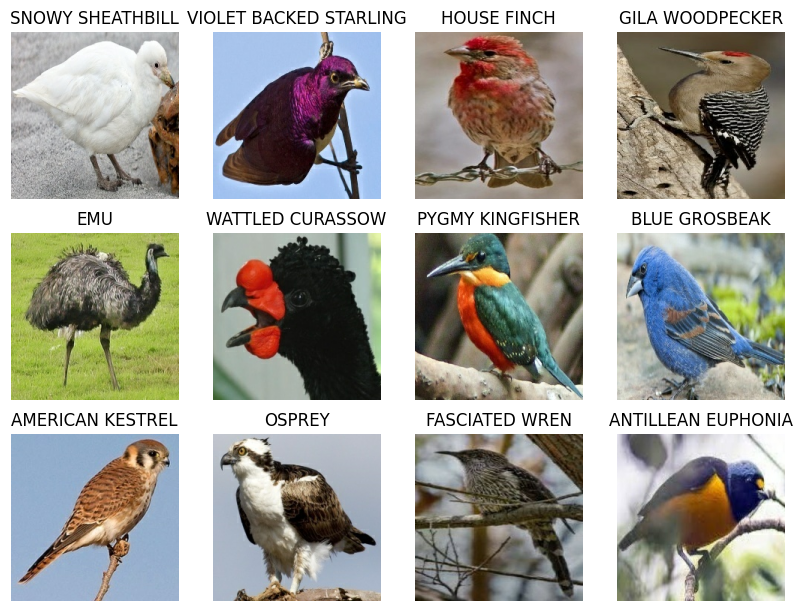

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images,labels in train_dataset.take(1):
    for i in range(12):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [5]:
from tensorflow import keras
from tensorflow.keras import layers
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.2),
        layers.RandomZoom(0.4),
    ]
)

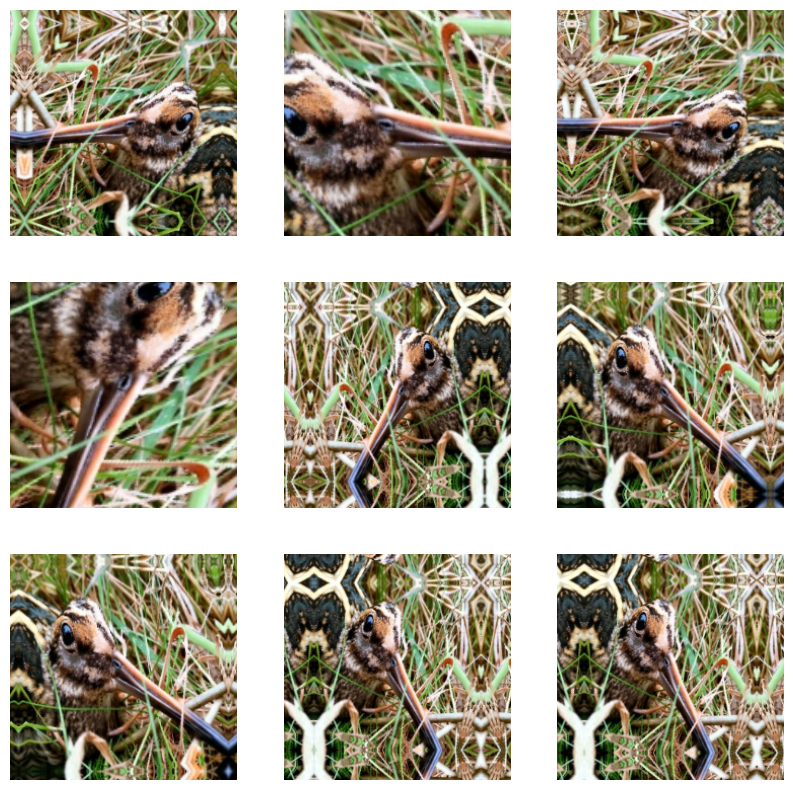

In [6]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [7]:
img_size = (224, 224)

In [8]:
inputs = keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.GlobalAveragePooling2D()(x)

x = layers.Dropout(0.5)(x)
outputs = layers.Dense(525, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 3)    │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 111, 111, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 55, 55, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 55, 55, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 53, 53, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 27, 27, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 27, 27, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 25, 25, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 13, 13, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 525)            │       134,925 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,115,353 (4.25 MB)

 Trainable params: 1,114,387 (4.25 MB)

 Non-trainable params: 966 (3.77 KB)

In [9]:
import tensorflow as tf
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [10]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="bird525_rmsprop.keras",
        save_best_only=True,
        monitor="val_loss")]

In [11]:
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validata,
    callbacks=callbacks)

Epoch 1/20


2024-04-24 20:59:15.765616: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49284: 7.84353, expected 6.92193
2024-04-24 20:59:15.765682: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49286: 7.76792, expected 6.84632
2024-04-24 20:59:15.765692: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49287: 6.15631, expected 5.23472
2024-04-24 20:59:15.765700: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49288: 6.71859, expected 5.797
2024-04-24 20:59:15.765709: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49289: 7.43913, expected 6.51753
2024-04-24 20:59:15.765717: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49290: 7.1783, expected 6.25671
2024-04-24 20:59:15.765725: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49291: 6.06838, expected 5.14679
2024-04-24 20:59:15.765734: E 

   3/2645 ━━━━━━━━━━━━━━━━━━━━ 1:59 45ms/step - accuracy: 0.0000e+00 - loss: 6.5486   

I0000 00:00:1713992364.779387      90 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2644/2645 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.0312 - loss: 5.8094

2024-04-24 21:01:40.678860: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 83: 6.15136, expected 5.43494
2024-04-24 21:01:40.678932: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 366: 5.89632, expected 5.1799
2024-04-24 21:01:40.678958: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1288: 5.9205, expected 5.20407
2024-04-24 21:01:40.678979: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1510: 5.4086, expected 4.69218
2024-04-24 21:01:40.679005: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2893: 6.0729, expected 5.35648
2024-04-24 21:01:40.679019: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2970: 6.02026, expected 5.30384
2024-04-24 21:01:40.679036: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3678: 6.03727, expected 5.32085
2024-04-24 21:01:40.679053: E external/lo

2645/2645 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.0312 - loss: 5.8091

2024-04-24 21:01:52.569603: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 147863: 4.14435, expected 3.59734
2024-04-24 21:01:52.569670: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 148032: 3.73171, expected 3.1847
2024-04-24 21:01:52.569688: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 148049: 4.2981, expected 3.75109
2024-04-24 21:01:52.569722: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 149297: 4.2275, expected 3.68049
2024-04-24 21:01:52.569734: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 149362: 3.89754, expected 3.35053
2024-04-24 21:01:52.569760: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 149444: 4.35104, expected 3.80403
2024-04-24 21:01:52.569772: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 149482: 4.25819, expected 3.71118
2024-04-24 21:01:52.569

2645/2645 ━━━━━━━━━━━━━━━━━━━━ 163s 56ms/step - accuracy: 0.0313 - loss: 5.8089 - val_accuracy: 0.2354 - val_loss: 5.5914
Epoch 2/20
2645/2645 ━━━━━━━━━━━━━━━━━━━━ 98s 37ms/step - accuracy: 0.1932 - loss: 4.0160 - val_accuracy: 0.4400 - val_loss: 5.6936
Epoch 3/20
2645/2645 ━━━━━━━━━━━━━━━━━━━━ 98s 37ms/step - accuracy: 0.3111 - loss: 3.3127 - val_accuracy: 0.5406 - val_loss: 8.2915
Epoch 4/20
2645/2645 ━━━━━━━━━━━━━━━━━━━━ 142s 37ms/step - accuracy: 0.3850 - loss: 2.9088 - val_accuracy: 0.5962 - val_loss: 10.7087
Epoch 5/20
2645/2645 ━━━━━━━━━━━━━━━━━━━━ 98s 37ms/step - accuracy: 0.4377 - loss: 2.6383 - val_accuracy: 0.6568 - val_loss: 8.3744
Epoch 6/20
2645/2645 ━━━━━━━━━━━━━━━━━━━━ 99s 37ms/step - accuracy: 0.4730 - loss: 2.4425 - val_accuracy: 0.6830 - val_loss: 11.2392
Epoch 7/20
2645/2645 ━━━━━━━━━━━━━━━━━━━━ 98s 37ms/step - accuracy: 0.5063 - loss: 2.3054 - val_accuracy: 0.7086 - val_loss: 1.8607
Epoch 8/20
2645/2645 ━━━━━━━━━━━━━━━━━━━━ 98s 37ms/step - accuracy: 0.5246 - loss: 

In [12]:
test_model = keras.models.load_model(
    "bird525_rmsprop.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.8029 - loss: 1.0382
Test accuracy: 0.798


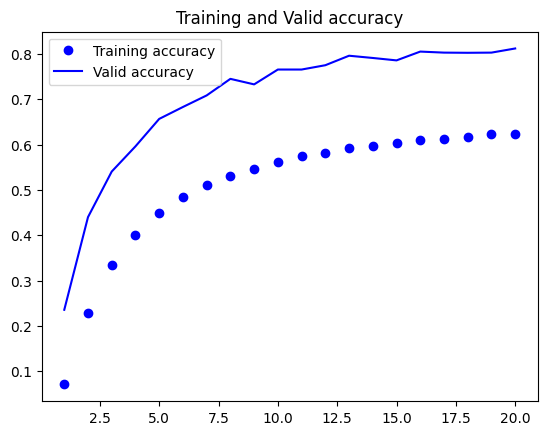

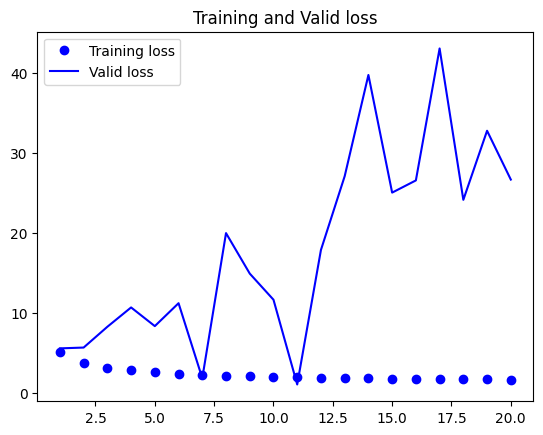

In [13]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Valid accuracy")
plt.title("Training and Valid accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Valid loss")
plt.title("Training and Valid loss")
plt.legend()
plt.show()

In [14]:
# pip install --upgrade scipy

In [15]:
# from sklearn.metrics import precision_recall_curve, roc_curve, auc, f1_score
# from sklearn.preprocessing import LabelBinarizer

# # Convert class labels to binary matrix
# lb = LabelBinarizer()
# lb.fit(np.arange(525))
# y_true_bin = lb.transform(y_true)

# # Calculate precision-recall curve and area under the curve
# precision = dict()
# recall = dict()
# pr_auc = dict()
# for i in range(525):
#     precision[i], recall[i], _ = precision_recall_curve(y_true_bin[:, i], predictions[:, i])
#     pr_auc[i] = auc(recall[i], precision[i])

# # Compute micro-average ROC curve and ROC area
# fpr, tpr, _ = roc_curve(y_true_bin.ravel(), predictions.ravel())
# roc_auc = auc(fpr, tpr)

# # Calculate F1-score
# f1 = f1_score(y_true, np.argmax(predictions, axis=1), average='weighted')

# # Plot Precision-Recall curve
# plt.figure()
# plt.plot(recall["micro"], precision["micro"], label='micro-average Precision-Recall curve (area = %0.2f)' % pr_auc["micro"])
# for i in range(525):
#     plt.plot(recall[i], precision[i], linestyle='--', label='Precision-recall curve of class {}'.format(i))
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Precision-Recall curve')
# plt.legend(loc="lower left")
# plt.show()

# # Plot ROC curve
# plt.figure()
# plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) curve')
# plt.legend(loc="lower right")
# plt.show()

# # Print F1-score
# print("F1-score: {:.3f}".format(f1))

In [16]:
# pred = model.predict(test_dataset)
# pred

In [17]:
# np.argmax(pred[0])

In [18]:
# from tensorflow.keras.utils import load_img, img_to_array
# def results(filename, class_names):
#     img = load_img(filename,target_size=(224,224))
#     imgconv = img_to_array(img)
#     img_array = np.expand_dims(imgconv,axis=0) 
#     pred = np.argmax(model.predict(img_array))
#     predimg = class_names[pred]
#     predver = np.max(model.predict(img_array))
#     pred
#     plt.imshow(img)
#     plt.title("Eto: {}, veroyatnost : {}".format (predimg, predver))

In [19]:
# results('/kaggle/input/100-bird-species/test/ANTBIRD/1.jpg', class_names)

In [20]:
# results('/kaggle/input/100-bird-species/test/CASSOWARY/3.jpg', class_names)

In [21]:
# results('/kaggle/input/100-bird-species/test/DUNLIN/4.jpg', class_names)